In [18]:
#%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
file_name = "time.txt"

data = pd.read_csv(file_name, delimiter='\t', header=None)

# Preview the data
print(data.head())

          0   1   2  3   4   5     6     7
0  12:32:35   0  14 -2  17  19  10,0  12,0
1  12:32:38  10  14 -2  17  19  10,0  12,0
2  12:32:48  20  14 -2  17  19  10,0  12,0
3  12:32:58  30  14 -2  17  19  10,0  12,0
4  12:33:08  40  14 -2  17  19  10,0  12,0


In [22]:
data.dtypes

0    object
1     int64
2     int64
3     int64
4     int64
5     int64
6    object
7    object
dtype: object

In [24]:
data.columns = ['timestamp', 'sTime','T0', 'T1', 'T2', 'T3', 'V', 'A']
print(data.head())

  timestamp  sTime  T0  T1  T2  T3     V     A
0  12:32:35      0  14  -2  17  19  10,0  12,0
1  12:32:38     10  14  -2  17  19  10,0  12,0
2  12:32:48     20  14  -2  17  19  10,0  12,0
3  12:32:58     30  14  -2  17  19  10,0  12,0
4  12:33:08     40  14  -2  17  19  10,0  12,0


In [26]:
#Delete Columns if needed

# Drop columns AIN1 to AIN4 
# inplace = True permanently deletes these
# data.drop(columns=['AIN0', 'AIN1', 'AIN2', 'AIN3'], inplace=True)

# OR keep specific columns

# List of columns to keep
#columns_to_keep = ['timestamp', 'AIN3', 'AIN4']

# Select only the desired columns
#data = data[columns_to_keep]

print(data.head())





  timestamp  sTime  T0  T1  T2  T3     V     A
0  12:32:35      0  14  -2  17  19  10,0  12,0
1  12:32:38     10  14  -2  17  19  10,0  12,0
2  12:32:48     20  14  -2  17  19  10,0  12,0
3  12:32:58     30  14  -2  17  19  10,0  12,0
4  12:33:08     40  14  -2  17  19  10,0  12,0


Deal with the time stamp.
1. Convert to date time
2. Extract seconds and milliseconds
3. Add a seconds and milli seconds to another column

In [29]:
# Ensure 'datetime' column is sorted (if not already sorted)

# Extract the first and last datetime
start_time = data['timestamp'].iloc[0]
end_time = data['timestamp'].iloc[-1]
duration_seconds = data['sTime'].iloc[-1]
duration_minutes = duration_minutes = duration_seconds // 60
rem_seconds = duration_seconds % 60
sampling_rate = data['sTime'].iloc[1]

print(f"Start Time: {start_time}")
print(f"End Time: {end_time}")
print(f"Duration: {int(duration_seconds)} seconds")
print(f"Duration: {duration_minutes} minutes and {rem_seconds} seconds.")
print(f"Sampling rate: {sampling_rate} seconds")


Start Time: 12:32:35
End Time: 19:19:48
Duration: 24440 seconds
Duration: 407 minutes and 20 seconds.
Sampling rate: 10 seconds


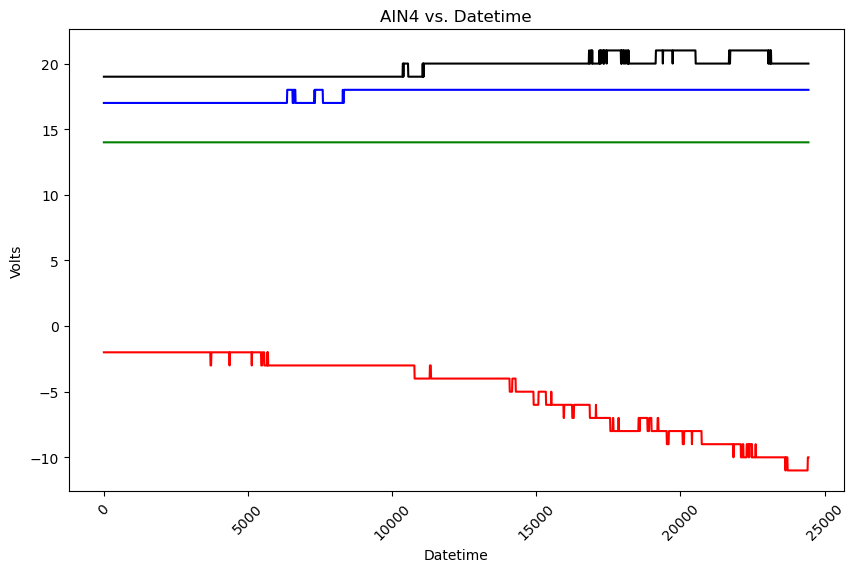

In [31]:
#subset_data = data.head(10)

#plt.plot(subset_data['+time'], subset_data['T3'], color='green')
plt.figure(figsize=(10,6))
plt.plot(data['sTime'], data['T0'], color='green')
plt.plot(data['sTime'], data['T1'], color='red')
plt.plot(data['sTime'], data['T2'], color='blue')
plt.plot(data['sTime'], data['T3'], color='black')
plt.xlabel('Datetime')
plt.ylabel('Volts')
plt.title('AIN4 vs. Datetime')
plt.xticks(rotation=45)
plt.show()


In [16]:
sStart = 500
sStop = 600
parsed_data = data[(data['sTime'] >= sStart) & (data['sTime'] <= sStop)]

plt.figure(figsize=(8,4))
plt.plot(parsed_data['sTime'], parsed_data['T0'], color='green')
plt.xlabel('Datetime')
plt.ylabel('Volts')
plt.title('AIN4 vs. Datetime')
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
#Find frequency (if periodic)
# Find where the sign changes between consecutive values
sign_changes = (parsed_data['AIN4'].shift(1) > 0) & (parsed_data['AIN4'] < 0) | (parsed_data['AIN4'].shift(1) < 0) & (parsed_data['AIN4'] > 0)

# Count the number of zero crossings
zero_crossings = sign_changes.sum()

# Print the result
print(f"{zero_crossings} zero crossings over {sTotal} seconds")

sTotal = (msStop - msStart)/1000
zero_crossings = zero_crossings - 1
cycles = zero_crossings / 2

freq = cycles / sTotal
freq = round(freq, 2)
if freq < 0:
        freq = 0

print(f"Frequency: {freq} Hz")